In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', start=start_date, end=end_date, progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-07-03  120.320000  121.019997  119.705002  120.559998  120.559998   
247 2023-07-05  120.059998  123.370003  120.059998  122.629997  122.629997   
248 2023-07-06  120.639999  121.150002  119.250000  120.930000  120.930000   
249 2023-07-07  120.889999  121.750000  120.089996  120.139999  120.139999   
250 2023-07-10  119.070000  119.070000  116.639999  116.870003  116.870003   

       Volume  
246  13888300  
247  17830300  
248  17732500  
249  20982400  
250  32835700  


In [ ]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-07-11  116.522499
1 2022-07-12  114.849503
2 2022-07-13  112.186996
3 2022-07-14  111.440002
4 2022-07-15  112.766998


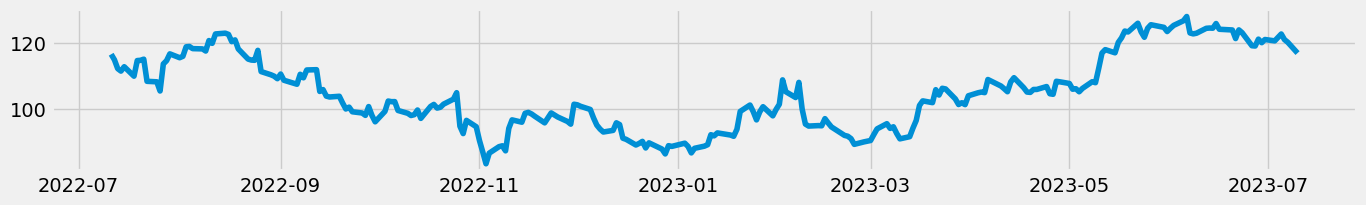

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 2))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

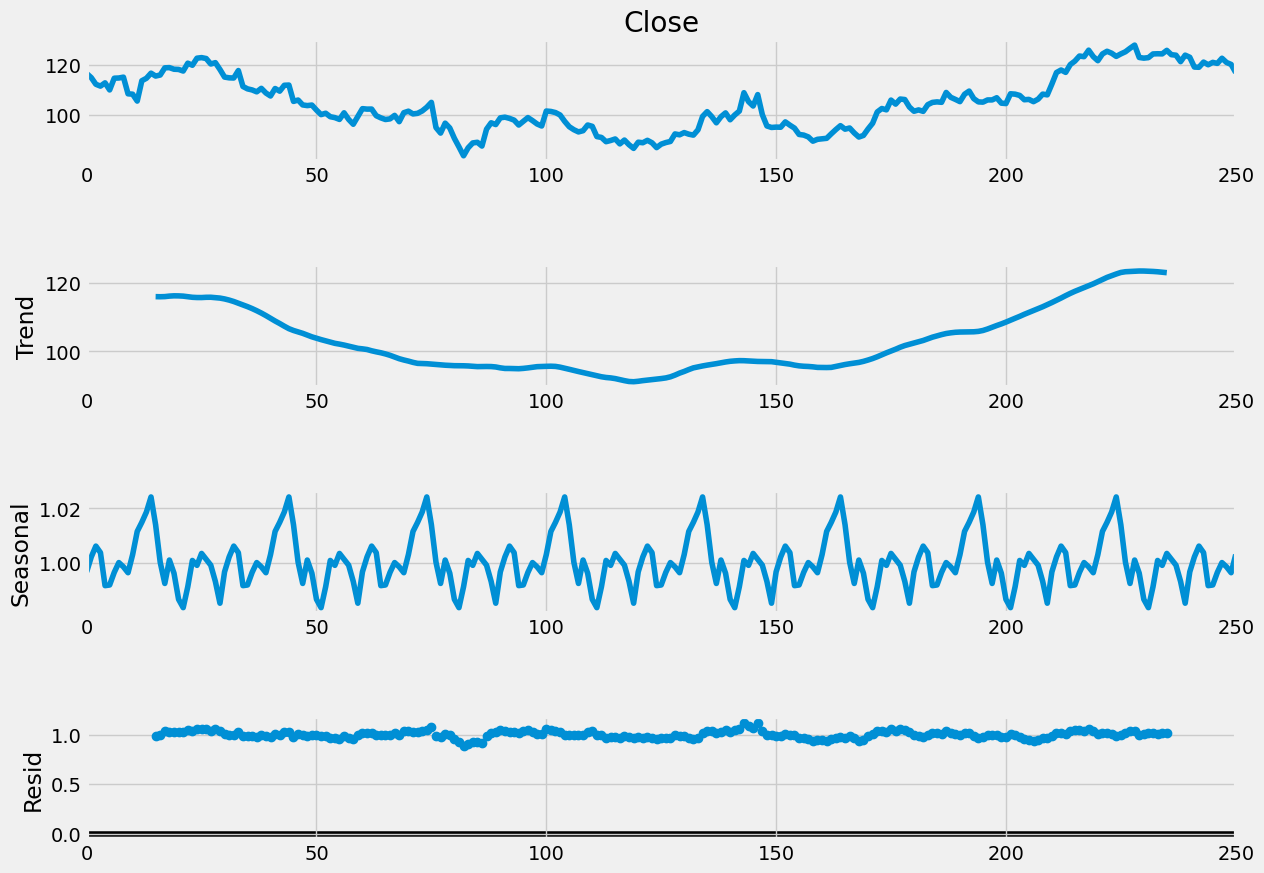

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

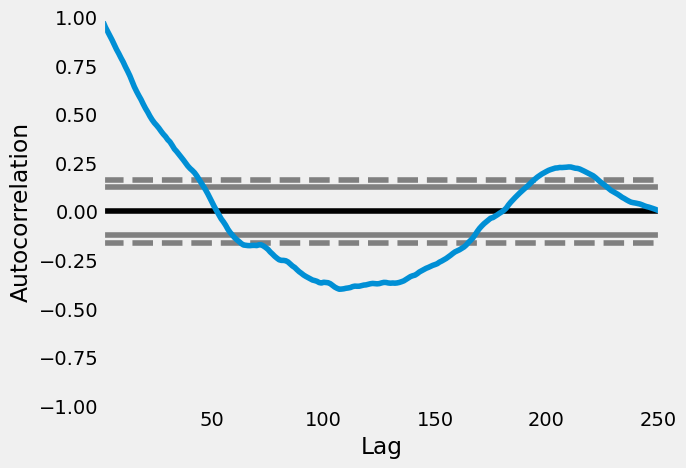

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


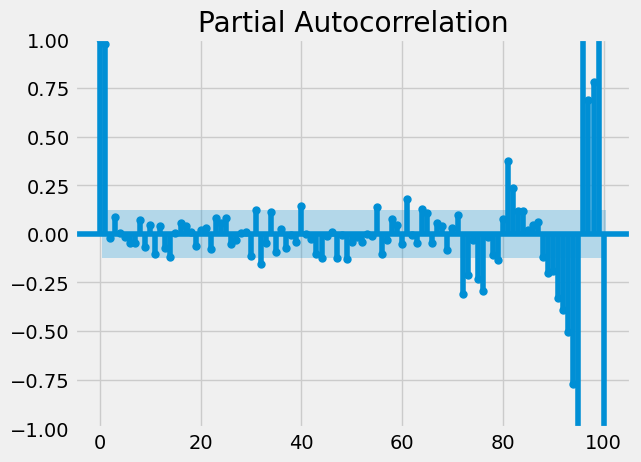

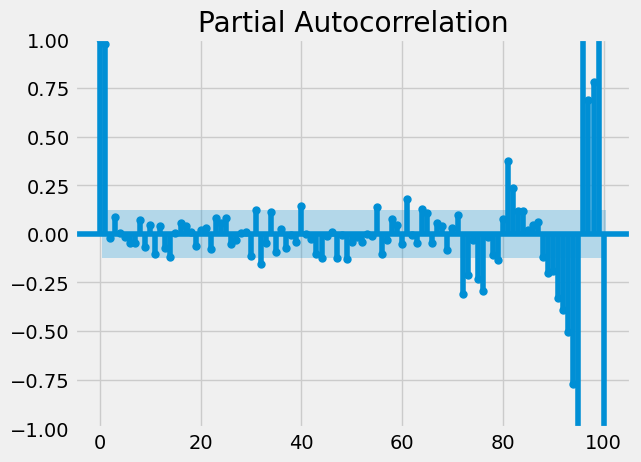

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [ ]:
p, d, q = 3, 1, 7
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(3, 1, 7)   Log Likelihood                -566.546
Date:                Tue, 11 Jul 2023   AIC                           1155.092
Time:                        08:45:35   BIC                           1193.828
Sample:                             0   HQIC                          1170.682
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7912      0.125     -6.353      0.000      -1.035      -0.547
ar.L2         -0.8384      0.037    -22.621      0.000      -0.911      -0.766
ar.L3         -0.9315      0.127     -7.350      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      116.522496
2      114.858015
3      112.340624
4      111.719003
          ...    
246    120.739621
247    120.695861
248    122.872800
249    120.749385
250    119.817217
Name: predicted_mean, Length: 251, dtype: float64


In [ ]:
import statsmodels.api as sm
import warnings
model = sm.tsa.statespace.SARIMAX(data["Close"], order=(p, d, q), seasonal_order=(p, d, q, 8))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  251
Model:             SARIMAX(3, 1, 7)x(3, 1, 7, 8)   Log Likelihood                -558.283
Date:                           Tue, 11 Jul 2023   AIC                           1158.566
Time:                                   08:47:17   BIC                           1231.834
Sample:                                        0   HQIC                          1188.081
                                           - 251                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6574      2.356      0.279      0.780      -3.960       5.275
ar.L2         -0.2921      2.778     -0.105

In [ ]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    120.424986
251    120.130939
252    119.736852
253    121.703181
254    121.518071
255    122.379430
256    122.067967
257    122.257373
258    123.942426
259    125.575246
260    124.487945
Name: predicted_mean, dtype: float64


<Axes: >

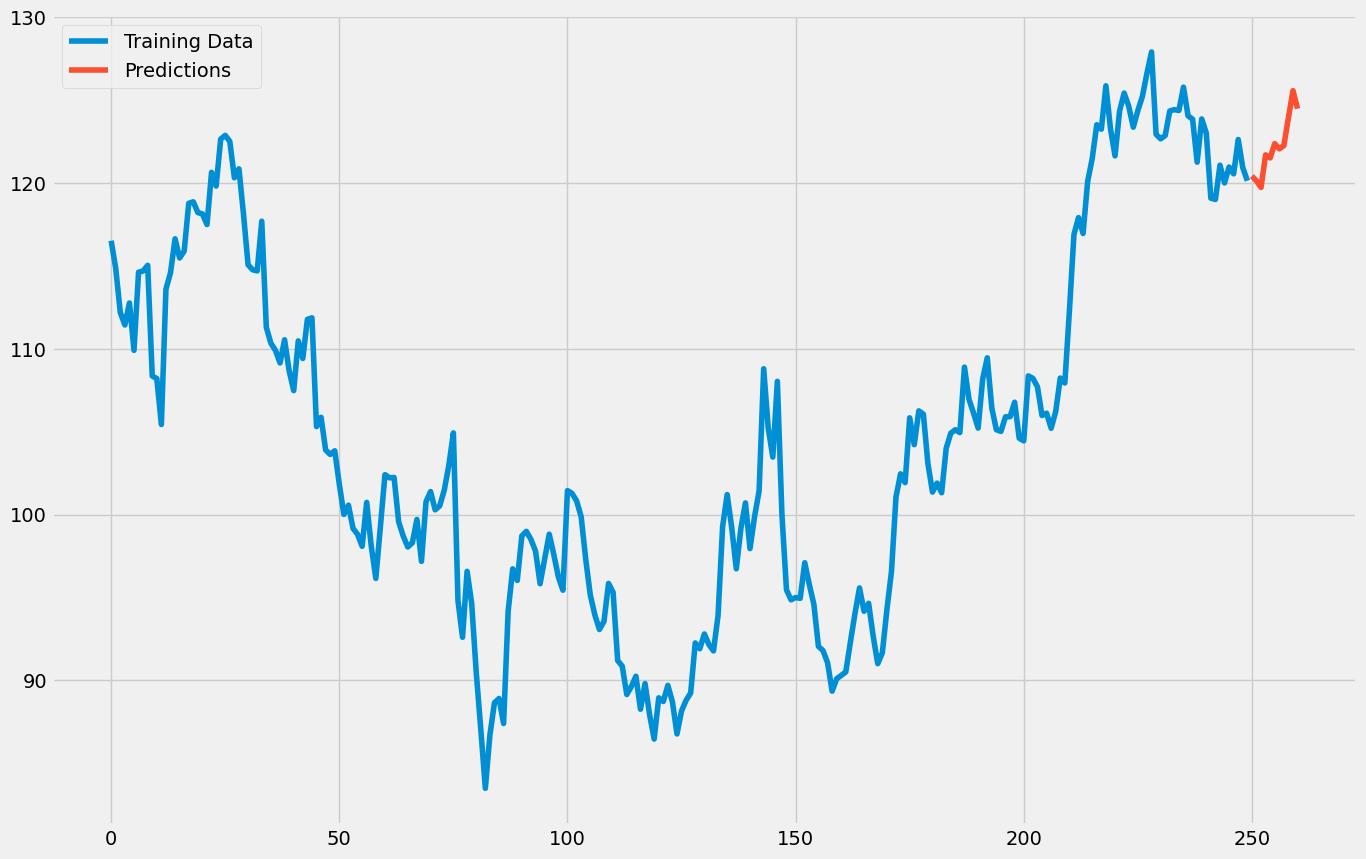

In [ ]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")